In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, mean_squared_error, r2_score

In [21]:
df = pd.read_csv(r"C:\Users\aleim\OneDrive\Documentos\UNAD\Primer semestre 2025\Analisis de Datos\Tarea 3\Dataset regresion Logistica\winequality-red.csv")

In [23]:
df.head()

df.isnull().sum()
df.describe()
df["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [25]:
df["quality_binaria"] = df["quality"].apply(lambda x: 1 if x >= 6 else 0)
df["quality_binaria"].value_counts()

quality_binaria
1    855
0    744
Name: count, dtype: int64

In [27]:
X = df.drop(["quality", "quality_binaria"], axis=1)
y = df["quality_binaria"]

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = modelo.predict(X_test)

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# AUC
probs = modelo.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, probs)
print("AUC:", auc)

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.69      0.74      0.72       141
           1       0.79      0.74      0.76       179

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320

Matriz de confusión:
[[105  36]
 [ 47 132]]
AUC: 0.8190498831173977


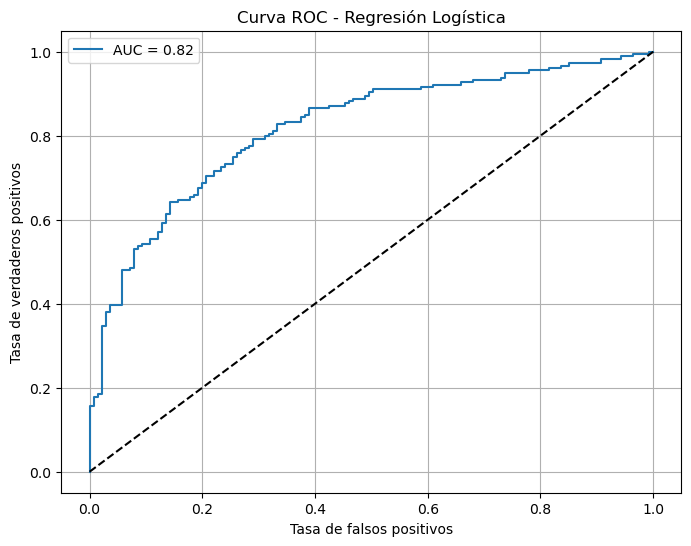

In [37]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC - Regresión Logística")
plt.legend()
plt.grid()
plt.show()